# Chronic Kidney Disease 
Chronic kidney disease has affected a valuable portion of World population. For instance, according the Global Burden of Disease study, chronic kidney disease is one of the leading causes of death in the World (Jha et al., 2013). In addition, Alebiosu and  Ayodele (2005) also  indicate that Chronic kidney disease is an aggravated problem for welfare and causes of death in the World. 

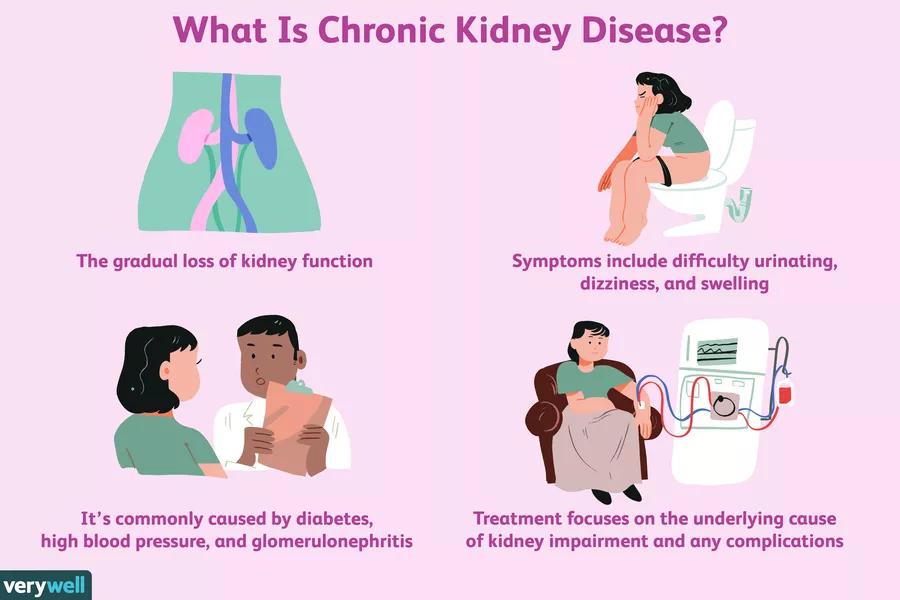
Source: https://www.verywellhealth.com/

***Objective***

The main purpose of this study is to raise awareness about how fatal Chronic Kidney disease is. To do this,I try to create a model to predict if a patient has this disease or not in the dataset.

# 1. IMPORT SOME NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings

from sklearn.tree import export_graphviz
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df=pd.read_csv("kidney_disease.csv")
pd.set_option('display.max_columns', None)

# 2. UNDERSTANDING THE DATA-SET

> Data Summary: The dataset used in this study is  received  from the UCI Machine Learning Repository.  The dataset was created by Soundarapandian and his colleague in 2015. It includes 400 samples with 25 variables, 11 numeric and 14 nominal. The dependent variable “class” has two categories (“CKD” and “NOTCKD”).

**> The description of variables in this data as follows:**
> **Dependent Variable:**
* target: Class (nominal): class - (ckd,notckd)

> **Independent Variable:**
1. Age(numerical) : age in years
1. Blood Pressure(numerical): bp in mm/Hg
1. Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
1. Albumin(nominal): al - (0,1,2,3,4,5)
1. Sugar(nominal): su - (0,1,2,3,4,5)
1. Red Blood Cells(nominal): rbc - (normal,abnormal)
1. Pus Cell (nominal): pc - (normal,abnormal)
1. Pus Cell clumps(nominal): pcc - (present,notpresent)
1. Bacteria(nominal): ba - (present,notpresent)
1. Blood Glucose Random(numerical): bgr in mgs/dl
1. Blood Urea(numerical): bu in mgs/dl
1. Serum Creatinine(numerical): sc in mgs/dl
1. Sodium(numerical): sod in mEq/L
1. Potassium(numerical) pot in mEq/L
1. Hemoglobin(numerical) hemo in gms
1. Packed Cell Volume(numerical)
1. White Blood Cell Count(numerical): wc in cells/cumm
1. Red Blood Cell Count(numerical): rc in millions/cmm
1. Hypertension(nominal) htn : (yes,no)
1. Diabetes Mellitus(nominal): dm - (yes,no)
1. Coronary Artery Disease(nominal): cad - (yes,no)
1. Appetite(nominal): appet - (good,poor)
1. Pedal Edema(nominal): pe - (yes,no)
1. Anemia(nominal): ane - (yes,no)**


In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.size

10400

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Checking missing value

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
id                  0
dtype: int64

As seen above, there are numerous missing values.  Most variables have various
amounts of missing entries. 

In [10]:
# Checking missing value with percent
mis_val_percent=((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
mis_val_percent

rbc               38.00
rc                32.50
wc                26.25
pot               22.00
sod               21.75
pcv               17.50
pc                16.25
hemo              13.00
su                12.25
sg                11.75
al                11.50
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
ba                 1.00
pcc                1.00
htn                0.50
dm                 0.50
cad                0.50
ane                0.25
appet              0.25
pe                 0.25
classification     0.00
id                 0.00
dtype: float64

The variables "'rc','wc','pcv'" are seen as object type. But they should be  numerical type. It needs to change them to numerical dtype.

In [11]:
for x in ['rc','wc','pcv']:
    df[x] = df[x].str.extract('(\d+)').astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

It need to drop "id" column. It doesn't have any help for the data analysis.

In [13]:
df.drop(["id"],axis=1,inplace=True)

In [14]:
# Filling missing numeric data in the dataset with mean
#for x in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
 #   df[x].fillna(df[x].mean(),inplace=True)

In [15]:
df= df.dropna()

In [16]:
df.isnull().sum().sort_values(ascending=False)

classification    0
sc                0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
ane               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
age               0
dtype: int64

In [17]:
df.shape

(158, 25)

# Replace Incorrect Values
•	There are some incorrect values  with columns “cad(coronary artery disease)”, “dm (diabetes mellitus)”, and “classification” such as tyes and \tno.  The values have been recovered systematically. 

In [18]:
df.cad.value_counts()

no     147
yes     11
Name: cad, dtype: int64

In [19]:
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')

In [20]:
df.cad.value_counts()

no     147
yes     11
Name: cad, dtype: int64

In [21]:
df.dm.value_counts()

no     130
yes     28
Name: dm, dtype: int64

In [22]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})

In [23]:
df.dm.value_counts()

no     130
yes     28
Name: dm, dtype: int64

In [24]:
df.classification.value_counts()

notckd    115
ckd        43
Name: classification, dtype: int64

In [25]:
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [26]:
df.classification.value_counts()

notckd    115
ckd        43
Name: classification, dtype: int64

In [27]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.0,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.0,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.0,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.0,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.0,yes,yes,yes,poor,yes,yes,ckd


# Cleaning and Preprocessing of Data 

In [28]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0})
e = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
df[e] = df[e].astype("O")
df['classification'] = df['classification'].astype("int")

In [29]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.0,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.0,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.0,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.0,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.0,1,1,1,0,1,1,1


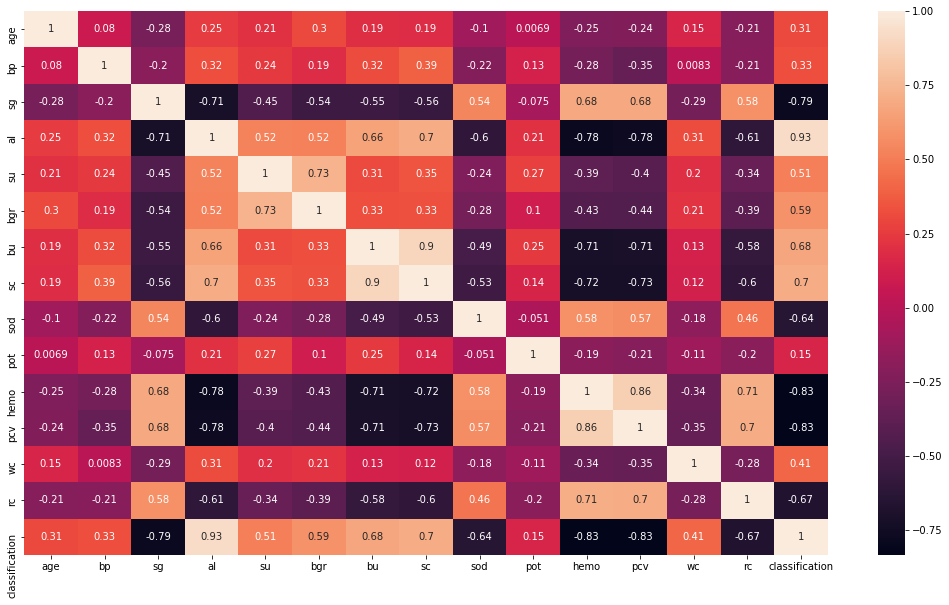

In [30]:
# Visualization
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

* There is no high correlation among the features in data set.

# 3. EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA

In [31]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
print(cat_cols)

Number of Categorical Variables :  10
['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


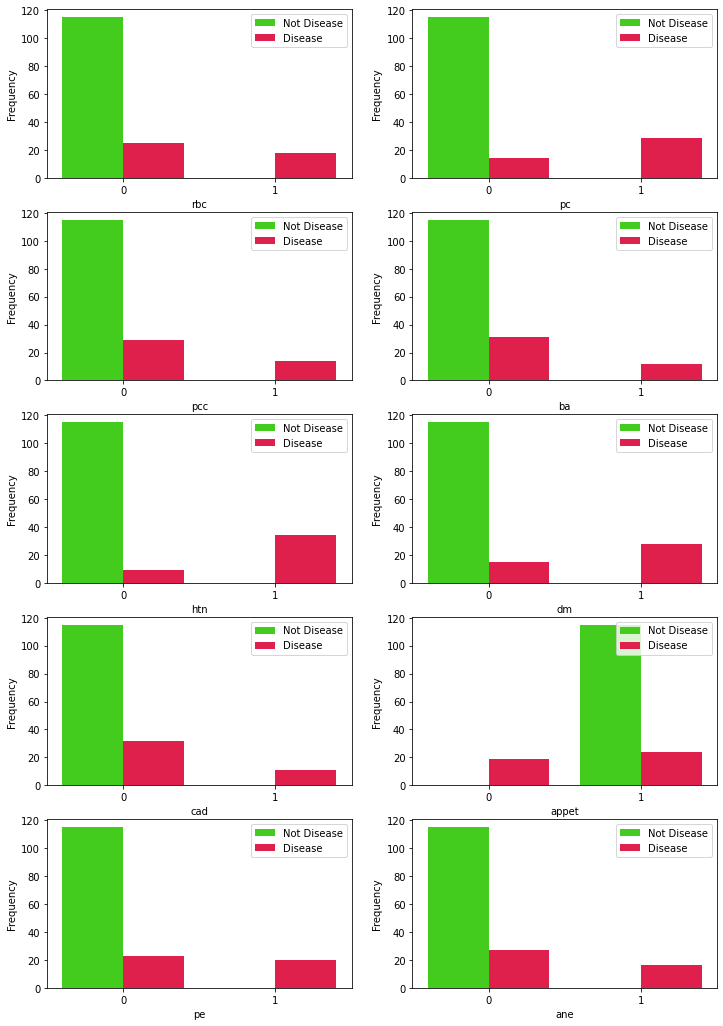

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(12,18))
fs = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='classification', data=df, palette='prism', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Not Disease", "Disease"])

# 4. ANALYSIS of NUMERICAL VARIABLE

In [33]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "id"]
print('Number of numeric variables: ', len(num_cols))

num_cols

Number of numeric variables:  15


['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'classification']

* **Visualization of numeric variables**

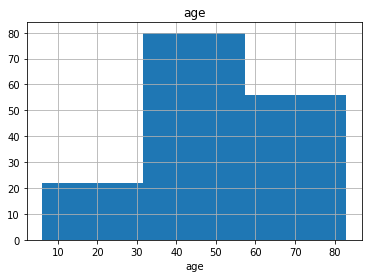

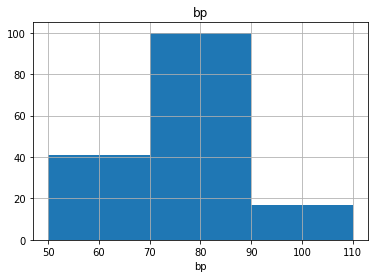

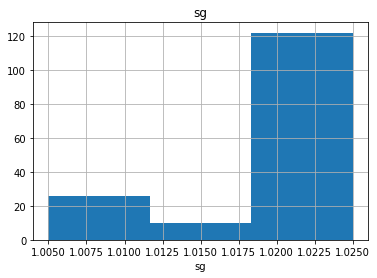

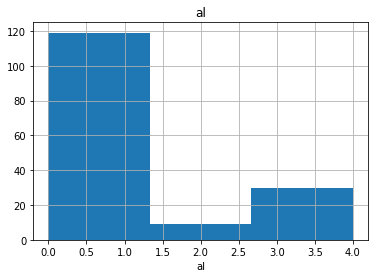

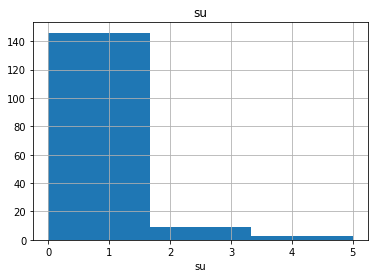

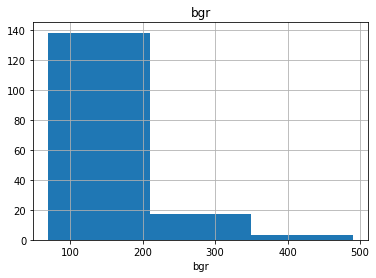

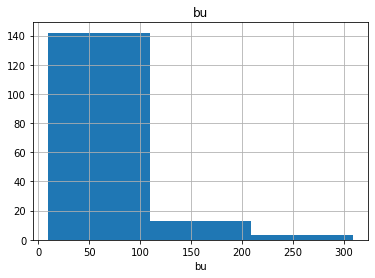

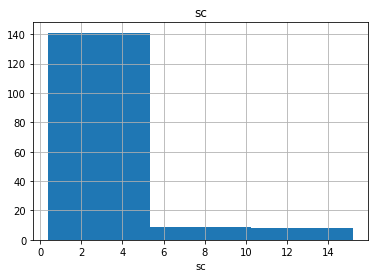

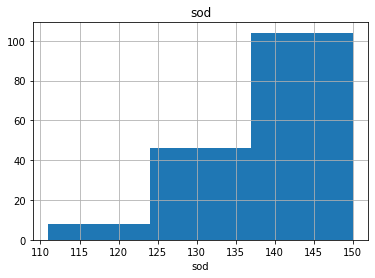

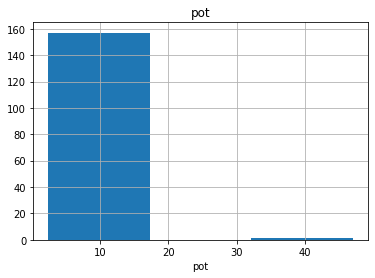

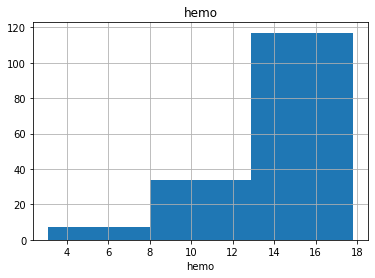

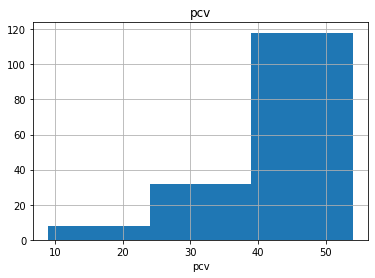

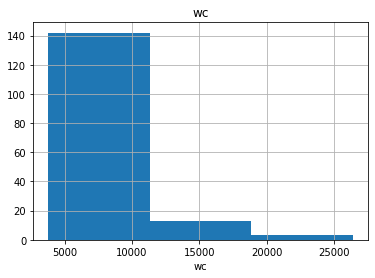

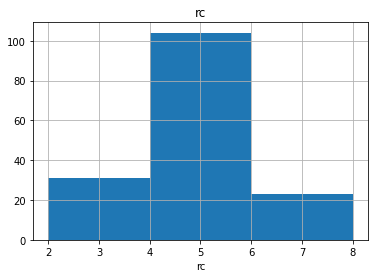

14 variables have been plotted


In [34]:
numeric_cols1= ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

def hist_for_nums(data, numeric_cols1):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols1:
        data[col].hist(bins=3)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")
hist_for_nums(df, numeric_cols1)


# 5. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

Finding the number of values in the dependent column
target: classification (0 = notckd, 1 = ckd)

In [35]:
df["classification"].value_counts()

0    115
1     43
Name: classification, dtype: int64

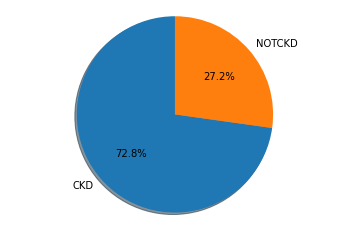

In [36]:
fig1, ax1 = plt.subplots()
ax1.pie(df["classification"].value_counts(),  labels=['CKD','NOTCKD'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

> As seen from the values above, there is no big imbalance between the classes of the dependent variable.

# 6. ONE-HOT ENCODING

In [37]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
cat_cols

Number of Categorical Variables :  10


['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [38]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}
df=df.replace(dictonary)

In [39]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.0,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.0,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.0,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.0,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.0,1,1,1,0,1,1,1


# 7. MODELING

* I split the data set: 80% of the data is train, and 20% of it is test data.

In [40]:
X = df.drop(['classification','sg', 'rc', 'pcv', 'hemo', 'sod', 'appet'], axis=1)
y = df[["classification"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [41]:
X.columns


Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

* **Scaling the features**

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

**8** **Model**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = logmodel.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

cm_test

array([[23,  0],
       [ 0,  9]], dtype=int64)

In [46]:
y_pred_train = logmodel.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
print(cm_train)

[[92  0]
 [ 0 34]]


In [47]:
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))

print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 1.0
Accuracy for test set for Logistic Regression = 1.0


In [48]:
import pickle

In [49]:
pickle.dump(logmodel, open('model_kidney.pkl','wb'))
model = pickle.load(open('model_kidney.pkl','rb'))